# Dive into atmospheric models

Let's explore relevant information about the atmospheric models available via SEDA.

In [1]:
import seda
import numpy as np


    SEDA package imported


Read a model grid of interst

In [2]:
model = 'Sonora_Elf_Owl'

# all folders with model spectra
model_dir = np.array(['/home/gsuarez/TRABAJO/MODELS/atmosphere_models/Sonora_Elf_Owl/spectra/output_275.0_325.0/', 
                      '/home/gsuarez/TRABAJO/MODELS/atmosphere_models/Sonora_Elf_Owl/spectra/output_350.0_400.0/', 
                      '/home/gsuarez/TRABAJO/MODELS/atmosphere_models/Sonora_Elf_Owl/spectra/output_425.0_475.0/', 
                      '/home/gsuarez/TRABAJO/MODELS/atmosphere_models/Sonora_Elf_Owl/spectra/output_500.0_550.0/', 
                      '/home/gsuarez/TRABAJO/MODELS/atmosphere_models/Sonora_Elf_Owl/spectra/output_575.0_650.0/', 
                      '/home/gsuarez/TRABAJO/MODELS/atmosphere_models/Sonora_Elf_Owl/spectra/output_700.0_800.0/', 
                      '/home/gsuarez/TRABAJO/MODELS/atmosphere_models/Sonora_Elf_Owl/spectra/output_850.0_950.0/', 
                      '/home/gsuarez/TRABAJO/MODELS/atmosphere_models/Sonora_Elf_Owl/spectra/output_1000.0_1200.0/',
                      '/home/gsuarez/TRABAJO/MODELS/atmosphere_models/Sonora_Elf_Owl/spectra/output_1300.0_1400.0/', 
                      '/home/gsuarez/TRABAJO/MODELS/atmosphere_models/Sonora_Elf_Owl/spectra/output_1600.0_1800.0/', 
                      '/home/gsuarez/TRABAJO/MODELS/atmosphere_models/Sonora_Elf_Owl/spectra/output_1900.0_2100.0/', 
                      '/home/gsuarez/TRABAJO/MODELS/atmosphere_models/Sonora_Elf_Owl/spectra/output_2200.0_2400.0/'
                     ])

Inspect the coverage of free parameters in the grid

Plot logg against Teff. We can use any combination of free parameters in the models


      43251 model spectra


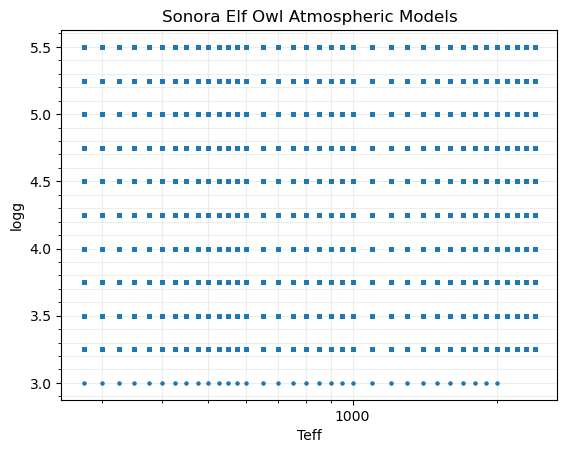

In [3]:
xparam = 'Teff'
yparam = 'logg'
seda.plot_model_coverage(model=model, model_dir=model_dir, xparam=xparam, yparam=yparam, xlog=True)

Let's inspect the resolution of the models. 

We need to provide a spectrum name or list of spectra names with the full path for which we want to check the resolution. 

Caveat: plotting the resolution of many high-resolution spectra may be quite slow and won't necessarily provide additional information.

Plot resolving power as a function of wavelength:


      43251 model spectra


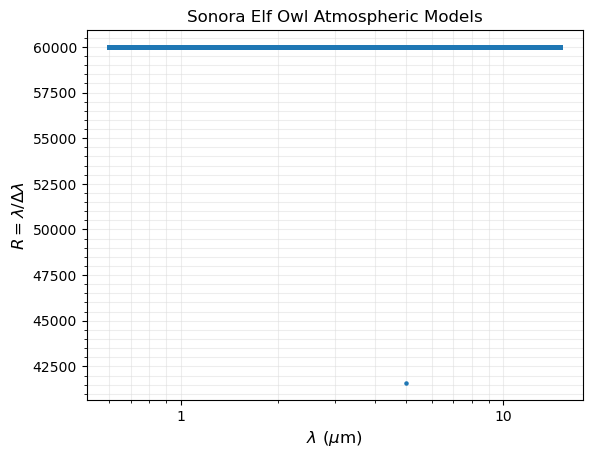

In [4]:
# get the names of all the spectra in 'model' and 'model_dir' defined above
out_select_model_spectra = seda.select_model_spectra(model=model, model_dir=model_dir)

# select any spectrum (the first one in the list, in this case)
spectra_name_full = out_select_model_spectra['spectra_name_full'][0]

# make the plot
seda.plot_model_resolution(model, spectra_name_full)

Let's plot now the spectral resolution vs. wavelength

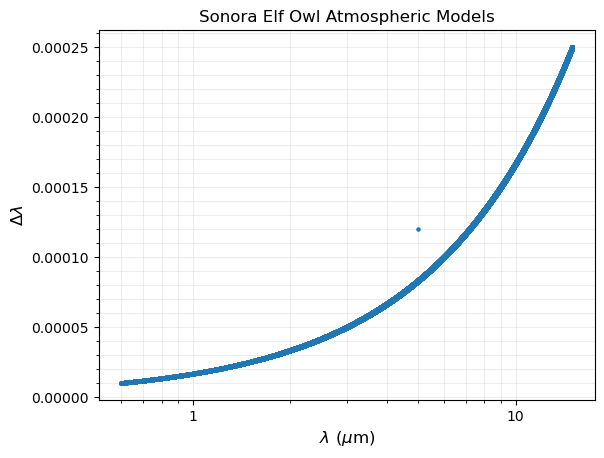

In [5]:
seda.plot_model_resolution(model, spectra_name_full, resolving_power=False)

Let's check the resolution of the Sonora Diamondback models


      1440 model spectra


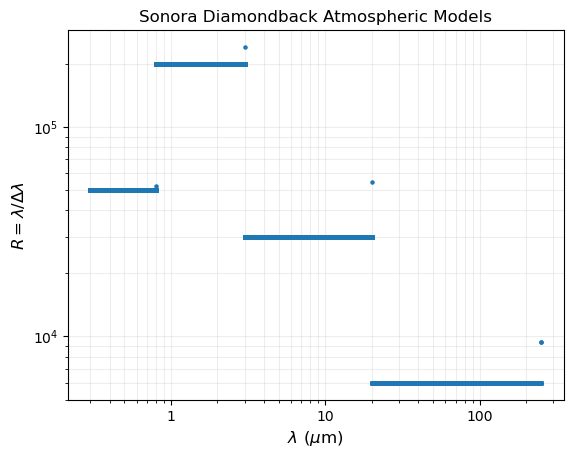

In [6]:
# get the names of all the spectra in the input directories
model = 'Sonora_Diamondback'
model_dir = ['/home/gsuarez/TRABAJO/MODELS/atmosphere_models/Sonora_Diamondback/spectra/']
out_select_model_spectra = seda.select_model_spectra(model=model, model_dir=model_dir) # get spectra names
spectra_name_full = out_select_model_spectra['spectra_name_full'][0] # select the first spectrum

seda.plot_model_resolution(model, spectra_name_full, ylog=True)

We can consider the resolution in logarithmic steps for wavelength

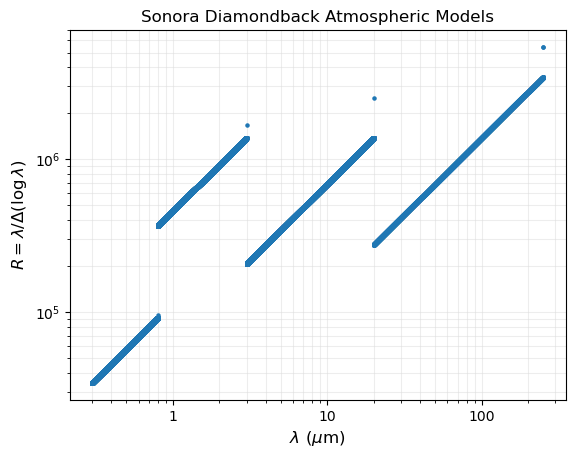

In [7]:
seda.plot_model_resolution(model, spectra_name_full, delta_wl_log=True, ylog=True)

Get all the unique parameter values covered by a grid

In [9]:
# let's consider the Sonora Diamondback models read above

# array with all the spectra names
spectra_name = out_select_model_spectra['spectra_name']

# separate parameters for the spectra
out_separate_params = seda.separate_params(model=model, spectra_name=spectra_name)

# get the unique values
print(f'\nUnique parameter values in {model}:')
print(f"\nTeff: {np.unique(out_separate_params['Teff'])}")
print(f"\nlogg: {np.unique(out_separate_params['logg'])}")
print(f"\nZ: {np.unique(out_separate_params['Z'])}")
print(f"\nfsed: {np.unique(out_separate_params['fsed'])}")


Unique parameter values in Sonora_Diamondback:

Teff: [ 900. 1000. 1100. 1200. 1300. 1400. 1500. 1600. 1700. 1800. 1900. 2000.
 2100. 2200. 2300. 2400.]

logg: [3.5 4.  4.5 5.  5.5]

Z: [-0.5  0.   0.5]

fsed: [ 1.  2.  3.  4.  8. 99.]
